In [3]:
# 引入mnist
from sklearn.datasets import fetch_openml
import numpy as np
Fashion_mnist = fetch_openml('Fashion-MNIST')

In [4]:
Fashion_mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['9', '0', '0', ..., '8', '1', '5'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [5]:
Fashion_mnist.target = Fashion_mnist.target.astype(np.int8)

In [6]:
np.unique(Fashion_mnist['target'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [7]:
x,y = Fashion_mnist['data'],Fashion_mnist['target']

In [8]:
import matplotlib
import matplotlib.pyplot as plt

In [14]:
class_names = ['短袖圓領T恤', '褲子', '套衫', '連衣裙', '外套',
              '涼鞋', '襯衫', '運動鞋','包', '短靴']

In [16]:
categorey = class_names[y[36030]]
categorey

'連衣裙'

In [10]:
digit = x[36030]

In [11]:
digit_image = digit.reshape(28,28)

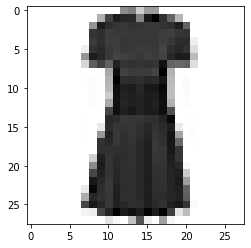

In [12]:
# 將彩色字白黑化
plt.imshow(digit_image,cmap = matplotlib.cm.binary)
# plt.axis('off')
plt.show()

In [139]:
x_train,x_test,y_train,y_test = x[:6000],x[6000:],y[:6000],y[6000:];#[開始（含）：到這之前（不含）]

In [17]:
shuffling_index = np.random.permutation(6000)

In [18]:
x_train,y_train = x[shuffling_index],y[shuffling_index]

In [33]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(x_train,y_train)
svm_classifier.predict([digit])

array([3], dtype=int8)

In [34]:
digit_scores = svm_classifier.decision_function([digit])
digit_scores

array([[ 8.28597423,  6.24807391,  3.76555106,  9.31390302,  4.78744357,
         1.7244613 ,  7.27868137, -0.30117838,  2.72568544,  0.70687675]])

In [39]:
# 使用sgd_classifier驗證對錯
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_classifier = SGDClassifier(random_state=42, max_iter=1000)
sgd_classifier.fit(x_train,y_train)

SGDClassifier(random_state=42)

In [40]:
sgd_classifier.predict([digit])

array([3], dtype=int8)

In [41]:
sgd_classifier.decision_function([digit])

array([[ -306624.33978509,  -735880.47003598,  -669511.82228864,
          587688.68363652,  -726927.52653686, -1562472.45884796,
         -507618.21635325, -1550157.75545849,  -596169.92983753,
        -1253027.25469337]])

In [42]:
cross_val_score(sgd_classifier,x_train,y_train,cv = 3,scoring = "accuracy")

array([0.7825, 0.7935, 0.77  ])

In [43]:
#confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_classifier,x_train,y_train, cv = 3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[384,   3,  15,  33,  12,   1, 103,   0,   8,   1],
       [  2, 606,   8,  15,   7,   0,   3,   0,   2,   0],
       [ 12,   5, 369,  14, 117,   0,  81,   0,   9,   1],
       [ 24,   8,   8, 506,  39,   0,  23,   0,   4,   0],
       [  2,   1,  67,  33, 426,   0,  50,   0,   5,   0],
       [  1,   2,   6,   6,   7, 497,   3,  20,  20,  32],
       [ 70,   3,  73,  33,  86,   1, 308,   0,  15,   1],
       [  1,   0,   0,   5,   0,  40,   0, 513,   8,  50],
       [  5,   1,  10,  12,  15,   6,  19,   5, 515,   2],
       [  1,   0,   0,   0,   0,   9,   1,  18,   5, 568]])

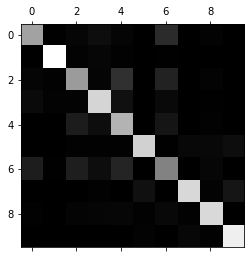

In [44]:
# 主對角線為分類正確的值
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

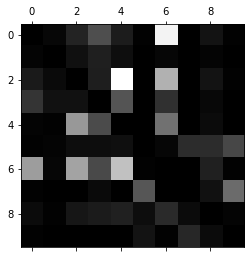

In [45]:
# 錯誤的分類
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [151]:
# Data Augmentation
from scipy.ndimage.interpolation import shift

def shift_image(digit_image, dx, dy):
    digit_image = digit_image.reshape((28, 28))
    shifted_image = shift(digit_image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [152]:
# Creating Augmented Dataset
x_train_augmented = [digit_image for digit_image in x_train]
y_train_augmented = [digit_image for digit_image in y_train]

for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
     for digit_image, label in zip(x_train, y_train):
             x_train_augmented.append(shift_image(digit_image, dx, dy))
             y_train_augmented.append(label)

In [112]:
# Shuffle the dataset
shuffle_idx = np.random.permutation(len(x_train_augmented))
x_train_augmented = np.array(x_train_augmented)[shuffle_idx]
y_train_augmented = np.array(y_train_augmented)[shuffle_idx]

In [113]:
# Training on augmented dataset
sgd_classifier_for_augmented = SGDClassifier(random_state=42, max_iter=1000)
sgd_classifier_for_augmented.fit(x_train_augmented,y_train_augmented)

SGDClassifier(random_state=42)

In [170]:
# Evaluating the model
from sklearn.metrics import accuracy_score
y_pred = sgd_classifier.predict(x_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy score before Data Augmentation:", score)

y_pred_after_augmented = sgd_classifier_for_augmented.predict(x_test)
score = accuracy_score(y_test, y_pred_after_augmented)
print("Accuracy score after Data Augmentation:", score)

Accuracy score before Data Augmentation: 0.860765625
Accuracy score after Data Augmentation: 0.866828125
